In [1]:
import warnings; warnings.filterwarnings('ignore')
import geopandas,pandas,numpy,seaborn,folium
import sqlite3,os,sympy,pylab as plt
from matplotlib import cm
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')
os.listdir('../input')

['central-fed-district-latest.osm.pbf',
 'moscow_region_barrierpoints.geojson',
 'moscow_region_transport_points.geojson',
 'moscow_region.osm.json',
 'moscow_region_landusages.geojson',
 'moscow_region_waterways.geojson',
 'map.geojson',
 'moscow_region_roads_gen0.geojson',
 'moscow_region_waterareas.geojson',
 'moscow_region_barrierways.geojson',
 'moscow_region_housenumbers_interpolated.geojson',
 'moscow_region_roads_gen1.geojson',
 'moscow_region_buildings.geojson',
 'moscow_region_amenities.geojson',
 'moscow_region_aeroways.geojson',
 'moscow_region_places.geojson',
 'moscow_region.osm',
 'moscow_region_roads.geojson',
 'moscow_region_admin.geojson',
 'map.osm',
 'moscow_region_housenumbers.geojson',
 'moscow_region_transport_areas.geojson']

In [2]:
from IPython.core.display import display
from IPython.core.magic import register_line_magic
@register_line_magic
def get_query(q):
    sympy.pprint(r'SQL Queries')
    tr=[]; cursor.execute(q)
    result=cursor.fetchall()
    for r in result: tr+=[r]
    display(pandas.DataFrame.from_records(tr)\
            .style.set_table_styles(style_dict))
def connect_to_db(dbf):
    sqlconn=None
    try:
        sqlconn=sqlite3.connect(dbf)
        return sqlconn
    except Error as err:
        print(err)
        if sqlconn is not None:
            sqlconn.close()
connection=connect_to_db('example.db')
if connection is not None:
    cursor=connection.cursor()
thp=[('font-size','15px'),('text-align','center'),
     ('font-weight','bold'),('padding','5px 5px'),
     ('color','white'),('background-color','slategray')]
tdp=[('font-size','14px'),('padding','5px 5px'),
     ('text-align','center'),('color','darkblue'),
     ('background-color','silver')]
style_dict=[dict(selector='th',props=thp),
            dict(selector='td',props=tdp)]
os.listdir()

['__notebook__.ipynb', 'example.db']

`map.geojson`

In [3]:
df=geopandas.read_file('../input/map.geojson')
fl=['addr:city','addr:country','addr:housenumber','addr:housenumber2',
    'addr:place','addr:postcode','addr:street','addr:street2', 
    'admin_level','amenity','area','artist_name','artwork_type','atm',
    'boundary','building','contact:fax','contact:phone','contact:website',
    'education','footway','government','height','heritage',
    'highway','historic','name','office','official_status','omkmo:code',
    'omkte:code','opening_hours','phone','place','public_transport',
    'religion', 'reservation', 'residential','room','service',
    'short_name','surface','timestamp','uid','user','version']
df[fl].to_sql('map',con=connection,if_exists='replace')
df.shape

(6020, 360)

In [4]:
print(sorted(df.columns)[:180])

['access', 'addr2:housenumber', 'addr2:street', 'addr:city', 'addr:country', 'addr:housenumber', 'addr:housenumber2', 'addr:housenumber3', 'addr:place', 'addr:postcode', 'addr:region', 'addr:street', 'addr:street2', 'addr:street3', 'admin_level', 'alt_name', 'alt_name:1', 'alt_name:de', 'alt_name:en', 'alt_name:mcm', 'alt_name:mcm_en', 'alt_name:uk', 'alt_name:vi', 'alt_ref', 'amenity', 'area', 'area:highway', 'artist_name', 'artwork_type', 'atm', 'barrier', 'bench', 'bic', 'bicycle', 'bicycle_parking', 'bin', 'bollard', 'boundary', 'brand', 'brand:en', 'brand:ru', 'brand:wikidata', 'brand:wikipedia', 'bridge', 'building', 'building:architecture', 'building:colour', 'building:levels', 'building:levels:underground', 'building:material', 'building:min_level', 'building:part', 'bus', 'busway', 'by_night', 'capacity', 'capacity:electric', 'castle_type', 'changeset', 'clothes', 'colour', 'communication:mobile_phone', 'community:gender', 'construction', 'construction:program', 'contact:email

In [5]:
print(sorted(df.columns)[180:360])

['name:cs', 'name:cv', 'name:da', 'name:de', 'name:el', 'name:en', 'name:eo', 'name:es', 'name:et', 'name:eu', 'name:fa', 'name:fi', 'name:fr', 'name:fy', 'name:gl', 'name:he', 'name:hr', 'name:hu', 'name:hy', 'name:id', 'name:io', 'name:it', 'name:ja', 'name:jp', 'name:ka', 'name:ko', 'name:ky', 'name:la', 'name:lt', 'name:mk', 'name:ms', 'name:nl', 'name:nn', 'name:no', 'name:pl', 'name:pt', 'name:ro', 'name:ru', 'name:sk', 'name:sl', 'name:sr', 'name:sv', 'name:th', 'name:tr', 'name:uk', 'name:vi', 'name:zh', 'name:zh_pinyin', 'natural', 'network', 'noexit', 'note', 'office', 'official_name', 'official_name:de', 'official_name:en', 'official_status', 'old_name', 'old_name:en', 'omkmo:code', 'omkte:code', 'omkum:old_name', 'oneway', 'opening_hours', 'operator', 'operator:en', 'operator:wikidata', 'operator:wikipedia', 'parking', 'paved:date', 'payment:cash', 'payment:credit_cards', 'payment:debit_cards', 'payment:maestro', 'payment:mastercard', 'payment:telephone_cards', 'payment:tro

In [6]:
users=set(df['user'])
print(sorted(users)[:20])

['Aleksandr Dezhin', 'Alexander Bobko', 'Alexander-II', 'Alexandr-cfif', 'Alexandrcfif', 'Alexey Lukin', 'AlexeyS', 'Amigo', 'Bakhtier Nikolkin', 'Bessarab', 'Canabis', 'Christinemad', 'DIG77', 'Dinara Zubaerova', 'Echo78', 'Erelen', 'F-5 System', 'Fantomas', 'Felis Pimeja', 'ForamaN']


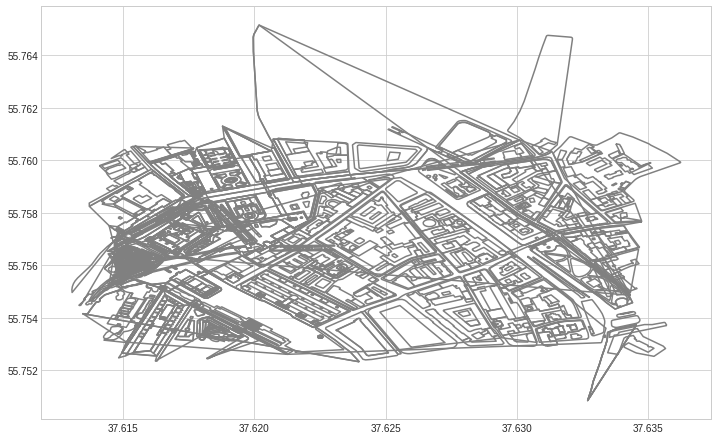

In [7]:
df.boundary.plot(figsize=(12,12),color='gray');

In [8]:
print(set(df['highway']))

{'primary', None, 'footway', 'service', 'secondary_link', 'cycleway', 'unclassified', 'residential', 'secondary', 'pedestrian', 'steps', 'traffic_signals', 'street_lamp', 'construction', 'tertiary', 'bus_stop', 'crossing', 'elevator'}


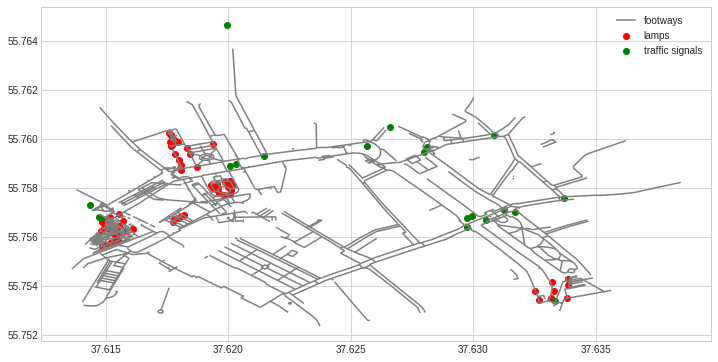

In [9]:
ax=df[df['highway']=='footway'].plot(figsize=(12,7),
                                     color='gray',label='footways')
df[df['highway']=='street_lamp'].plot(ax=ax,color='r',label='lamps')
df[df['highway']=='traffic_signals'].plot(ax=ax,color='g',
                                          label='traffic signals')
plt.legend();

In [10]:
print(set(df['building']))

{'cathedral', 'roof', 'kiosk', 'church', None, 'ruins', 'commercial', 'service', 'public', 'yes', 'university', 'apartments', 'hotel', 'train_station', 'garages', 'retail', 'chapel', 'wall', 'office'}


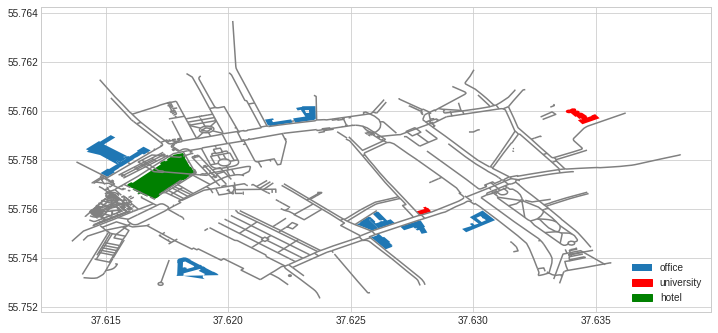

In [11]:
ax1=df[df['building']=='office'].plot(figsize=(12,7))
df[df['building']=='university'].plot(ax=ax1,color='r')
df[df['building']=='hotel'].plot(ax=ax1,color='g')
df[df['highway']=='footway'].plot(color='gray',ax=ax1)
blue_patch=mpatches.Patch(label='office')
red_patch=mpatches.Patch(color='r',label='university')
green_patch=mpatches.Patch(color='g',label='hotel')
plt.legend(handles=[blue_patch,red_patch,green_patch],loc=4);

`moscow_region_admin.geojson`, `moscow_region_roads.geojson`, `moscow_region_waterareas.geojson`

In [12]:
df_admin=geopandas.read_file('../input/moscow_region_admin.geojson')
df_roads=geopandas.read_file('../input/moscow_region_roads.geojson')
df_waterareas=geopandas.read_file('../input/moscow_region_waterareas.geojson')
fl=['id','osm_id','name','type','admin_level','geometry']
df_admin.columns=fl
df_admin[fl[:-1]].to_sql('admin',con=connection,if_exists='replace')
df_roads.iloc[:,:-1].to_sql('roads',con=connection,if_exists='replace')
df_waterareas.iloc[:,:-1].to_sql('waterareas',con=connection,if_exists='replace')
df_admin.shape,df_roads.shape,df_waterareas.shape

((33, 6), (29606, 13), (3297, 6))

In [13]:
df_roads.head(3).T\
.style.set_table_styles(style_dict)

,0,1,2
id,1,2,3
osm_id,2.02722e+07,2.02722e+07,8.65463e+06
type,residential,tertiary,trunk
name,5-й проезд 1905 года,улица 40 лет Октября,
tunnel,0,0,0
bridge,0,0,1
oneway,0,0,0
ref,,,А-107
z_order,3,4,28
access,,,


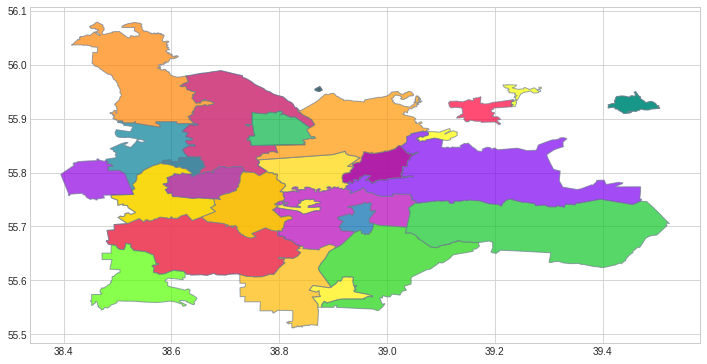

In [14]:
df_admin.geometry.plot(figsize=(12,12),alpha=.7,
                       edgecolor='slategray',cmap=cm.prism);

`sql`

In [15]:
%get_query \
SELECT * \
FROM sqlite_master;

SQL Queries


,0,1,2,3,4
0,table,map,map,2,"CREATE TABLE ""map"" ( ""index"" INTEGER, ""addr:city"" TEXT, ""addr:country"" TEXT, ""addr:housenumber"" TEXT, ""addr:housenumber2"" TEXT, ""addr:place"" TEXT, ""addr:postcode"" TEXT, ""addr:street"" TEXT, ""addr:street2"" TEXT, ""admin_level"" TEXT, ""amenity"" TEXT, ""area"" TEXT, ""artist_name"" TEXT, ""artwork_type"" TEXT, ""atm"" TEXT, ""boundary"" TEXT, ""building"" TEXT, ""contact:fax"" TEXT, ""contact:phone"" TEXT, ""contact:website"" TEXT, ""education"" TEXT, ""footway"" TEXT, ""government"" TEXT, ""height"" TEXT, ""heritage"" TEXT, ""highway"" TEXT, ""historic"" TEXT, ""name"" TEXT, ""office"" TEXT, ""official_status"" TEXT, ""omkmo:code"" TEXT, ""omkte:code"" TEXT, ""opening_hours"" TEXT, ""phone"" TEXT, ""place"" TEXT, ""public_transport"" TEXT, ""religion"" TEXT, ""reservation"" TEXT, ""residential"" TEXT, ""room"" TEXT, ""service"" TEXT, ""short_name"" TEXT, ""surface"" TEXT, ""timestamp"" TEXT, ""uid"" TEXT, ""user"" TEXT, ""version"" TEXT )"
1,index,ix_map_index,map,3,"CREATE INDEX ""ix_map_index""ON ""map"" (""index"")"
2,table,admin,admin,180,"CREATE TABLE ""admin"" ( ""index"" INTEGER, ""id"" REAL, ""osm_id"" REAL, ""name"" TEXT, ""type"" TEXT, ""admin_level"" REAL )"
3,index,ix_admin_index,admin,181,"CREATE INDEX ""ix_admin_index""ON ""admin"" (""index"")"
4,table,roads,roads,182,"CREATE TABLE ""roads"" ( ""index"" INTEGER, ""id"" REAL, ""osm_id"" REAL, ""type"" TEXT, ""name"" TEXT, ""tunnel"" INTEGER, ""bridge"" INTEGER, ""oneway"" INTEGER, ""ref"" TEXT, ""z_order"" REAL, ""access"" TEXT, ""service"" TEXT, ""class"" TEXT )"
5,index,ix_roads_index,roads,183,"CREATE INDEX ""ix_roads_index""ON ""roads"" (""index"")"
6,table,waterareas,waterareas,599,"CREATE TABLE ""waterareas"" ( ""index"" INTEGER, ""id"" REAL, ""osm_id"" REAL, ""name"" TEXT, ""type"" TEXT, ""area"" REAL )"
7,index,ix_waterareas_index,waterareas,600,"CREATE INDEX ""ix_waterareas_index""ON ""waterareas"" (""index"")"


In [16]:
%get_query \
PRAGMA table_info("waterareas")

SQL Queries


,0,1,2,3,4,5
0,0,index,INTEGER,0,None,0
1,1,id,REAL,0,None,0
2,2,osm_id,REAL,0,None,0
3,3,name,TEXT,0,None,0
4,4,type,TEXT,0,None,0
5,5,area,REAL,0,None,0


In [17]:
%get_query \
SELECT DISTINCT name \
FROM roads \
WHERE type="residential";

SQL Queries


,0
0,5-й проезд 1905 года
1,
2,6-й проезд 1905 года
3,улица Калинина
4,Полевая улица
5,улица Свердлова
6,Коммунистическая улица
7,улица 1905 Года
8,улица 1 Мая
9,Железнодорожная улица


In [18]:
if connection is not None:
    connection.close()
if os.path.exists('example.db'):
    os.remove('example.db')
else:
    print('The file does not exist')
os.listdir()

['__notebook__.ipynb']

To be continued...